In [1]:
%matplotlib inline
import lightkurve as lk

In [4]:
search = lk.search_targetpixelfile('TOI 700')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,150428135,0.0
1,TESS Sector 03,2018,SPOC,120,150428135,0.0
2,TESS Sector 04,2018,SPOC,120,150428135,0.0
3,TESS Sector 05,2018,SPOC,120,150428135,0.0
4,TESS Sector 06,2018,SPOC,120,150428135,0.0
5,TESS Sector 09,2019,SPOC,120,150428135,0.0
6,TESS Sector 07,2019,SPOC,120,150428135,0.0
7,TESS Sector 08,2019,SPOC,120,150428135,0.0
8,TESS Sector 10,2019,SPOC,120,150428135,0.0


In [6]:
search_result = lk.search_targetpixelfile('TOI 700', sector=28)

In [8]:
print(search_result)

SearchResult containing 3 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 28 2020      SPOC      20   150428135      0.0
  1 TESS Sector 28 2020      SPOC     120   150428135      0.0
  2 TESS Sector 28 2020 TESS-SPOC     600   150428135      0.0


In [12]:
tpf = search_result[1].download()

<Axes: title={'center': 'Target ID: 150428135, Cadence: 600765'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

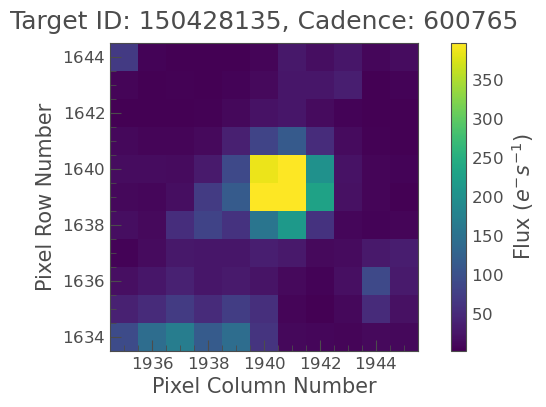

In [14]:
tpf.plot()

In [16]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2061.8507207771927,5852.4853515625,9.250771522521973,1940.793661892494,1639.3510532527725,600765,0
2061.8521096649465,5827.99609375,9.235124588012695,1940.7934981004732,1639.3458898829635,600766,0
2061.8534985526994,5838.88525390625,9.24416446685791,1940.7932885430944,1639.348372411584,600767,0
2061.854887440453,5845.95458984375,9.242511749267578,1940.796237113192,1639.34471557485,600768,0
2061.8562763282066,5845.416015625,9.244497299194336,1940.7926465214066,1639.3440115606245,600769,0
2061.85766521596,5850.0400390625,9.24737548828125,1940.7958443736654,1639.3484654069605,600770,0
2061.859054103713,5846.65478515625,9.246689796447754,1940.7960655944105,1639.342480514887,600771,0
2061.8604429914676,5847.09521484375,9.251679420471191,1940.7942255137455,1639.3471363051824,600772,0


In [18]:
lc.sector

28

In [20]:
lc.flux, lc.time

(<Quantity [5852.4854, 5827.996 , 5838.8853, ..., 5794.789 , 5843.679 ,
            5826.294 ] electron / s>,
 <Time object: scale='tdb' format='btjd' value=[2061.85072078 2061.85210966 2061.85349855 ... 2087.09371331 2087.09510219
  2087.09649108]>)

In [22]:
lc.estimate_cdpp()

<Quantity 461.48782335 ppm>

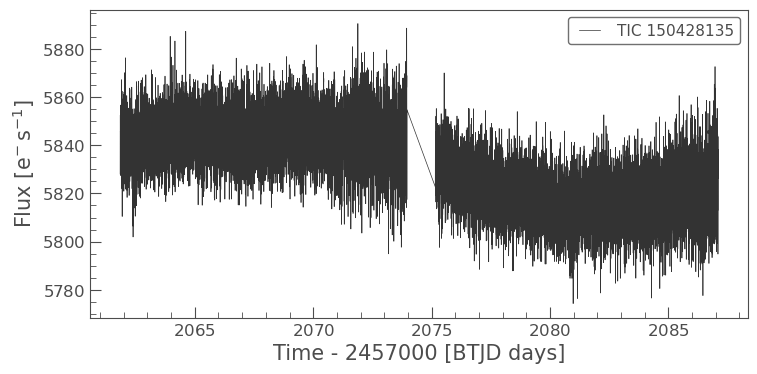

In [24]:
%matplotlib inline
lc.plot();

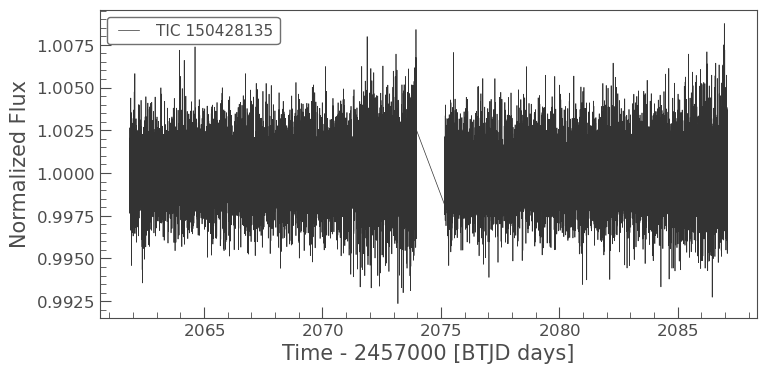

In [26]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

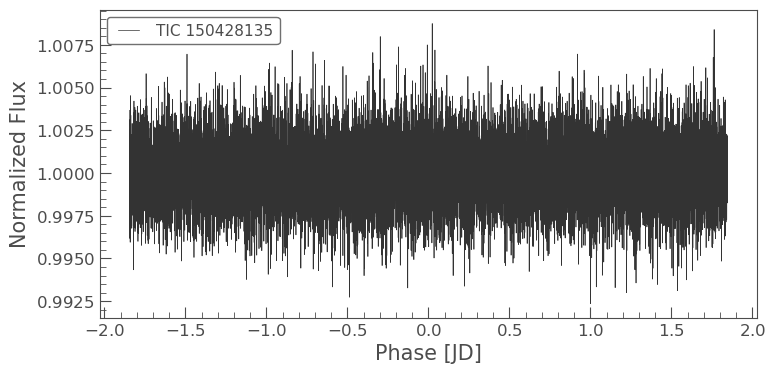

In [28]:
folded_lc = flat_lc.fold(period=3.690621,  epoch_time=1367.2755)
folded_lc.plot();

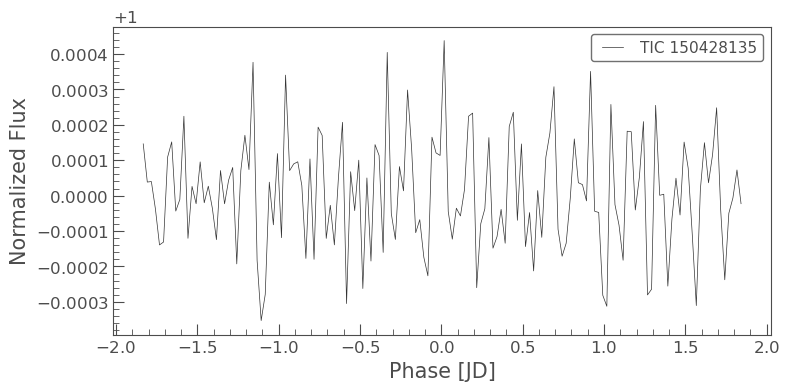

In [30]:
binned_lc = folded_lc.bin(time_bin_size=0.025)
binned_lc.plot();